In [132]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
df = pd.read_csv('data_1.5_merged.csv', low_memory = False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [133]:
# test/train split
test = df[(df['Year'] > 2017)] # 2018,19, 20 test years
train = df[(df['Year'] < 2018)]

In [134]:
# training loop with teams
averages = []
team_weight = []
years = []
values = [*range(1, 99, 1)]
# DEFINE VARIABLES
dates = []
predicted = []

# LOOP
for x in values:
    print("Taking team weight of "+str(x)+" %.")
    dates = []
    predicted = []
    for year in train.Year.unique():
        set0 = train[(train['Year'] == year)]
        #print("Taking year "+str(year)+" .")
        for race in set0.Name.unique():
            set1 = set0[(set0['Name'] == race)]
            for stage in set1.Stage.unique():
                if set1['Stage'].iloc[0] == 0: # oneday
                    set2 = set1[(set1['Stage'] == stage)]
                    for team in set2.Team.unique():
                        set3 = set2.loc[set2['Team'] == team]
                        set3.loc[:,'Team_strength_this_season'] = 0
                        set3.loc[:,'Indiv_team_this_season'] = 0

                        set3.loc[:,'Team_strength_this_season'] = sum(set3['Oneday_current_season'])
                        set3.loc[:,'Indiv_team_this_season'] = x*set3.loc[:,'Team_strength_this_season'] + (100-x)*set3.loc[:,'Oneday_current_season']
                        set4 = set3.sort_values("Indiv_team_this_season", ascending = False)[:1] # filter the best rider on the team
                        dates.append(set4['Date'].iloc[0])
                        predicted.append(set4['Rnk'].iloc[0])
                elif set2['Stage'].iloc[0] == -1: # GC:
                    set2 = set1[(set1['Stage'] == stage)]
                    for team in set2.Team.unique():
                        set3 = set2.loc[set2['Team'] == team]
                        set3.loc[:,'Team_strength_this_season'] = 0
                        set3.loc[:,'Indiv_team_this_season'] = 0

                        set3.loc[:,'Team_strength_this_season'] = sum(set3['GC_current_season'])
                        set3.loc[:,'Indiv_team_this_season'] = x*set3.loc[:,'Team_strength_this_season'] + (100-x)*set3.loc[:,'GC_current_season']
                        set4 = set3.sort_values("Indiv_team_this_season", ascending = False)[:1]
                        dates.append(set4['Date'].iloc[0])
                        predicted.append(set4['Rnk'].iloc[0])
                elif set2['ProfileScore'].iloc[0] >= 50: # Climb:
                    set2 = set1[(set1['Stage'] == stage)]
                    for team in set2.Team.unique():
                        set3 = set2.loc[set2['Team'] == team]
                        set3.loc[:,'Team_strength_this_season'] = 0
                        set3.loc[:,'Indiv_team_this_season'] = 0

                        set3.loc[:,'Team_strength_this_season'] = sum(set3['Climb_current_season'])
                        set3.loc[:,'Indiv_team_this_season'] = x*set3.loc[:,'Team_strength_this_season'] + (100-x)*set3.loc[:,'Climb_current_season']
                        set4 = set3.sort_values("Indiv_team_this_season", ascending = False)[:1]
                        dates.append(set4['Date'].iloc[0])
                        predicted.append(set4['Rnk'].iloc[0])
                else: # Sprint:
                    set2 = set1[(set1['Stage'] == stage)]
                    for team in set2.Team.unique():
                        set3 = set2.loc[set2['Team'] == team]
                        set3.loc[:,'Team_strength_this_season'] = 0
                        set3.loc[:,'Indiv_team_this_season'] = 0

                        set3.loc[:,'Team_strength_this_season'] = sum(set3['Sprint_current_season'])
                        set3.loc[:,'Indiv_team_this_season'] = x*set3.loc[:,'Team_strength_this_season'] + (100-x)*set3.loc[:,'Sprint_current_season']
                        set4 = set3.sort_values("Indiv_team_this_season", ascending = False)[:1]
                        dates.append(set4['Date'].iloc[0])
                        predicted.append(set4['Rnk'].iloc[0])
#########################################
    results = {'Date': dates,
                'Predicted': predicted
                }
    import datetime as dt
    results = pd.DataFrame(results)
    results['Year'] = pd.DatetimeIndex(results['Date']).year
    results['Month'] = pd.DatetimeIndex(results['Date']).month
    results['Day'] = pd.DatetimeIndex(results['Date']).day
    ab=results.groupby([(results.Year),(results.Month),(results.Day)]).sum()

    averages.append(ab.Predicted.mean())
    team_weight.append(x)
    years.append(year)
definitive = {'Year': years, 'Weight': team_weight, 'Score': averages}
definitive = pd.DataFrame(definitive)
definitive


 set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Tom\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Tom\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

KeyboardInterrupt: 

In [137]:
set3.sort_values("Indiv_team_this_season", ascending = False)[:1]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Rnk,GC,Rider,Age,Team,Name,Stage,Date,Avg. speed winner,ProfileScore,Distance,RaceRanking,Sprint_pts,Climb_pts,Oneday_pts,GC_pts,Sprint_cumsum,Climb_cumsum,Oneday_cumsum,GC_cumsum,Year,Month,Day,Sprint_current_season,Sprint_2011_sum,Climb_2011_sum,Oneday_2011_sum,GC_2011_sum,Sprint_2012_sum,Climb_2012_sum,Oneday_2012_sum,GC_2012_sum,Sprint_2013_sum,Climb_2013_sum,Oneday_2013_sum,GC_2013_sum,Sprint_2014_sum,Climb_2014_sum,Oneday_2014_sum,GC_2014_sum,Sprint_2015_sum,Climb_2015_sum,Oneday_2015_sum,GC_2015_sum,Sprint_2016_sum,Climb_2016_sum,Oneday_2016_sum,GC_2016_sum,Sprint_2017_sum,Climb_2017_sum,Oneday_2017_sum,GC_2017_sum,Sprint_2018_sum,Climb_2018_sum,Oneday_2018_sum,GC_2018_sum,Sprint_2019_sum,Climb_2019_sum,Oneday_2019_sum,GC_2019_sum,Sprint_2020_sum,Climb_2020_sum,Oneday_2020_sum,GC_2020_sum,Climb_current_season,Oneday_current_season,GC_current_season,Team_strength_this_season,Indiv_team_this_season
33096,33096,5163,243974,0,NaN,1649,29.0,74,3,0,2012-04-01,42.134,0,256.0,16,0.0,0.0,7.0,0.0,50.0,0.0,146.0,42.0,2012,4,1,0.0,50.0,0.0,111.0,37.0,76.0,35.0,40.0,35.0,0.0,0.0,13.0,20.0,58.0,0.0,49.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,5.0,80.0,3590.0


In [64]:
definitive.to_csv("baseline_3.csv")

In [157]:
set0.head(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Rnk,GC,Rider,Age,Team,Name,Stage,Date,Avg. speed winner,ProfileScore,Distance,RaceRanking,Sprint_pts,Climb_pts,Oneday_pts,GC_pts,Sprint_cumsum,Climb_cumsum,Oneday_cumsum,GC_cumsum,Year,Month,Day,Sprint_current_season,Sprint_2011_sum,Climb_2011_sum,Oneday_2011_sum,GC_2011_sum,Sprint_2012_sum,Climb_2012_sum,Oneday_2012_sum,GC_2012_sum,Sprint_2013_sum,Climb_2013_sum,Oneday_2013_sum,GC_2013_sum,Sprint_2014_sum,Climb_2014_sum,Oneday_2014_sum,GC_2014_sum,Sprint_2015_sum,Climb_2015_sum,Oneday_2015_sum,GC_2015_sum,Sprint_2016_sum,Climb_2016_sum,Oneday_2016_sum,GC_2016_sum,Sprint_2017_sum,Climb_2017_sum,Oneday_2017_sum,GC_2017_sum,Sprint_2018_sum,Climb_2018_sum,Oneday_2018_sum,GC_2018_sum,Sprint_2019_sum,Climb_2019_sum,Oneday_2019_sum,GC_2019_sum,Sprint_2020_sum,Climb_2020_sum,Oneday_2020_sum,GC_2020_sum,Climb_current_season,Oneday_current_season,GC_current_season
158958,158958,0,201175,0,34.0,1239,31.0,19,10,1,2017-01-17,34.8,0,118.5,34,0.0,0.0,0.0,0.0,18.0,0.0,40.0,170.0,2017,1,17,0.0,0.0,0.0,5.0,35.0,18.0,0.0,20.0,35.0,0.0,0.0,10.0,5.0,0.0,0.0,5.0,30.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,35.0,0.0,0.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158959,158959,1,53870,0,5.0,242,27.0,42,10,1,2017-01-17,34.8,0,118.5,34,0.0,0.0,0.0,0.0,93.0,2.0,217.0,195.0,2017,1,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,20.0,5.0,52.0,0.0,15.0,165.0,21.0,2.0,27.0,15.0,20.0,0.0,155.0,5.0,85.0,0.0,225.0,140.0,44.0,32.0,117.0,138.0,0.0,5.0,47.0,13.0,5.0,18.0,48.0,75.0,0.0,0.0,0.0
158960,158960,2,1448,0,103.0,5,20.0,10,10,1,2017-01-17,34.8,0,118.5,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,1,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,16.0,0.0,0.0,5.0,25.0,0.0,0.0,0.0
158961,158961,3,145779,0,42.0,723,27.0,84,10,1,2017-01-17,34.8,0,118.5,34,0.0,0.0,0.0,0.0,2.0,0.0,10.0,110.0,2017,1,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,25.0,0.0,0.0,10.0,5.0,0.0,0.0,0.0,25.0,2.0,0.0,0.0,30.0,6.0,8.0,15.0,35.0,0.0,0.0,5.0,5.0,0.0,0.0,10.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0
158962,158962,4,25932,0,101.0,120,19.0,10,10,1,2017-01-17,34.8,0,118.5,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,1,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,12.0,40.0,0.0,0.0,13.0,35.0,0.0,0.0,8.0,60.0,0.0,64.0,13.0,25.0,0.0,0.0,0.0
158963,158963,5,155973,0,7.0,831,27.0,75,10,1,2017-01-17,34.8,0,118.5,34,0.0,0.0,0.0,0.0,130.0,2.0,0.0,25.0,2017,1,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124.0,2.0,0.0,20.0,6.0,0.0,0.0,5.0,0.0,0.0,44.0,32.0,42.0,42.0,30.0,141.0,0.0,0.0,28.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158964,158964,6,150411,0,NaN,781,26.0,84,10,1,2017-01-17,34.8,0,118.5,34,0.0,0.0,0.0,0.0,86.0,0.0,54.0,92.0,2017,1,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,14.0,25.0,1.0,0.0,10.0,45.0,50.0,0.0,20.0,12.0,34.0,0.0,5.0,10.0,0.0,0.0,0.0,5.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158965,158965,7,132085,0,11.0,633,28.0,75,10,1,2017-01-17,34.8,0,118.5,34,4.0,0.0,0.0,0.0,4.0,0.0,5.0,0.0,2017,1,17,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,55.0,15.0,76.0,0.0,13.0,25.0,0.0,0.0,104.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158966,158966,8,79855,0,2.0,365,23.0,58,10,1,2017-01-17,34.8,0,118.5,34,30.0,0.0,0.0,0.0,382.0,0.0,146.0,54.0,2017,1,17,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,0.0,0.0,5.0,62.0,0.0,15.0,20.0,172.0,0.0,5.0,20.0,34.0,0.0,126.0,9.0,214.0,0.0,13.0,13.0,323.0,15.0,29.0,48.0,87.0,13.0,174.0,5.0,26.0,0.0,10.0,5.0,0.0,0.0,0.0
158967,158967,9,166360,0,32.0,893,37.0,52,10,1,2017-01-17,34.8,0,118.5,34,0.0,0.0,0.0,0.0,123.0,40.0,244.0,327.0,2017,1,17,0.0,3.0,40.0,134.0,66.0,89.0,0.0,10.0,50.0,30.0,0.0,20.0,50.0,1.0,0.0,25.0,50.0,0.0,0.0,20.0,64.0,0.0,0.0,35.0,47.0,0.0,0.0,33.0,58.0,0.0,0.0,79.0,38.0,0.0,0.0,24.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [170]:
# ONEDAY ONLY
averages = []
team_weight = []
years = []
values = [*range(1, 99, 50)]
n_races = []
# DEFINE VARIABLES
dates = []
predicted = []
import datetime as dt

# LOOP
for x in values:
    print("Taking team weight of "+str(x)+" %.")
    dates = []
    predicted = []
    for year in train.Year.unique():
        set0 = train[(train['Year'] == year)]
        #print("Taking year "+str(year)+" .")
        for race in set0.Name.unique():
            set1 = set0[(set0['Name'] == race)]
            for stage in set1.Stage.unique():
                set2 = set1[(set1['Stage'] == stage)]
                n_races.append(1)
                if set2['Stage'].iloc[0] == 0: # oneday
                    for team in set2.Team.unique():
                        set3 = set2.loc[set2['Team'] == team]
                        set3.loc[:,'Team_strength_this_season'] = 0
                        set3.loc[:,'Indiv_team_this_season'] = 0

                        set3.loc[:,'Team_strength_this_season'] = sum(set3['Oneday_current_season'])
                        set3.loc[:,'Indiv_team_this_season'] = x*set3.loc[:,'Team_strength_this_season'] + (100-x)*set3.loc[:,'Oneday_current_season']
                        set4 = set3.sort_values("Indiv_team_this_season", ascending = False)[:1] # filter the highest-ranked rider on the team
                        dates.append(set4['Date'].iloc[0])
                        predicted.append(set4['Rnk'].iloc[0])
                        team_weight.append(x)

 set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Tom\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Tom\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [182]:
sum(predicted)/len(n_races)

0.019861830742659757

In [79]:
definitive.head(10)
redo = definitive.drop(['Year'], axis = 1)
redo.head(10)
redo1 = redo.groupby(redo.Weight).mean()
redo.head(4)

,Weight,Score
0,1,0.276596
1,1,0.286486
2,1,0.309353
3,1,0.294595


In [63]:
results = {'Date': dates,
        'Predicted': predicted
        }
import datetime as dt
results = pd.DataFrame(results)
results['Year'] = pd.DatetimeIndex(results['Date']).year
results['Month'] = pd.DatetimeIndex(results['Date']).month
results['Day'] = pd.DatetimeIndex(results['Date']).day
ab=results.groupby([(results.Year),(results.Month),(results.Day)]).sum()

ab.Predicted.mean()

0.2929936305732484

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

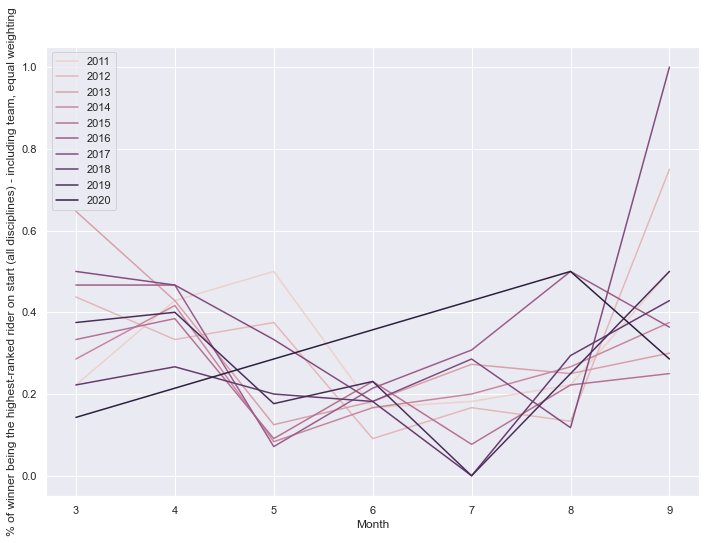

In [74]:
ab.reset_index()
ax = sns.lineplot(x='Month',y='Predicted',hue='Year',data=GB)
ax.set(ylabel = "% of winner being the highest-ranked rider on start (all disciplines) - including team, equal weighting")
plt.legend(labels=['2011', '2012','2013', '2014','2015', '2016','2017', '2018','2019', '2020'])
plt.savefig('./graphs/fig2.2.png')

In [ ]:
test = df[(df['Year'] == 2017)]
test = test[(test['RaceRanking'] == 1)]
set3 = test[(test['Stage'] == -1)]#.sort_values("Sprint_current_season", ascending = False)#[:3]
for team in set3.Team.unique():
    set4 = set3.loc[set3['Team'] == team].copy()
    set4.loc[:,'Team_strength_this_season'] = 0
    #set4.loc[:,'Team_strength_all_time'] = 0
    set4.loc[:,'Team_strength_this_season'] = sum(set4['GC_current_season'])
    #set4.loc[:,'Team_strength_all_time'] = sum(set4['GC_cumsum'])
    set4.loc[:,'Indiv_team_this_season'] = set4.loc[:,'Team_strength_this_season'] + set4.loc[:,'GC_current_season']


    end_res = end_res.append(set4, ignore_index=True)
set3 = end_res.sort_values("Indiv_team_this_season", ascending = False)[:1]
dates.append(set3['Date'].iloc[0])
predicted.append(set3['Rnk'].iloc[0])
